# MNIST Dataset

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sys
import os
import importlib

sys.path.insert(1, os.path.realpath(os.path.pardir))

import mnist as mnist

importlib.reload(mnist);

In [3]:
X_train, X_test, y_train, y_test = mnist.load_data()
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

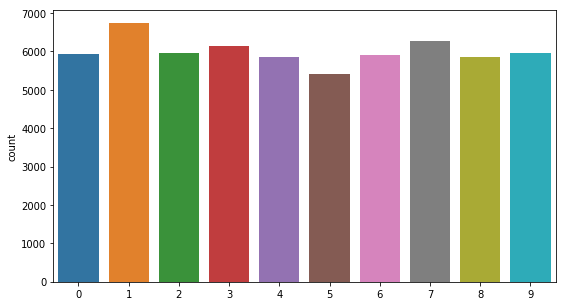

In [4]:
fig, ax = plt.subplots(figsize=(9, 5))
sns.countplot(x=y_train, ax=ax)

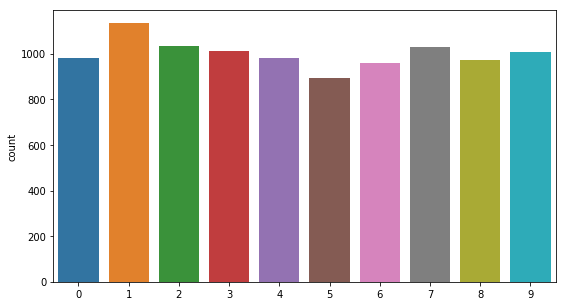

In [5]:
fig, ax = plt.subplots(figsize=(9, 5))
sns.countplot(x=y_test, ax=ax)

In [6]:
def select_ten_digits(labels):
    image_indices = []
    for number in range(10):
        # Find indicies where elements equal to a specific number
        indices = np.where(labels == number)[0]
        rnd_idx = np.random.choice(indices, 1)[0]
        image_indices.append(rnd_idx)
    return image_indices

In [7]:
def plot_ten_digits(images, indices):
    num_rows = 2
    num_columns = 5
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, sharex=True, sharey=True, figsize=(7, 3))
    plt.subplots_adjust(hspace=0.01, wspace=0.09) 
    for row in range(num_rows):
        for column in range(num_columns):
            img = images[indices[column + (row*num_columns)]]
            img = img.reshape(28, 28)
            ax = axes[row][column]
            ax.imshow(img, cmap='gist_gray')
            #ax.set_axis_off()
            ax.tick_params(axis='both', which='major', bottom=False, labelbottom=False, left=False, labelleft=False)
    
    

In [8]:
indicies = select_ten_digits(np.unique(y_train))

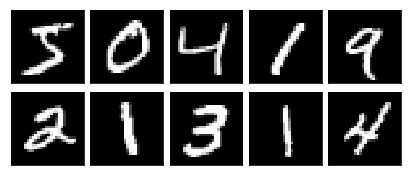

In [9]:
plot_ten_digits(X_train, indicies)

In [27]:
def plot_2d(data, labels, image_path=None):
    fig, ax = plt.subplots(figsize=(17, 12))

    x1_coords = data.T[0]
    x2_coords = data.T[1]

    for label in np.unique(labels):
        ix = np.where(y_train == label)
        ax.scatter(x1_coords[ix], x2_coords[ix], label=label)
    ax.legend()
    if image_path is not None:
        fig.savefig(image_path, format='svg', dpi=1200)

In [12]:
from sklearn.decomposition import PCA

In [29]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

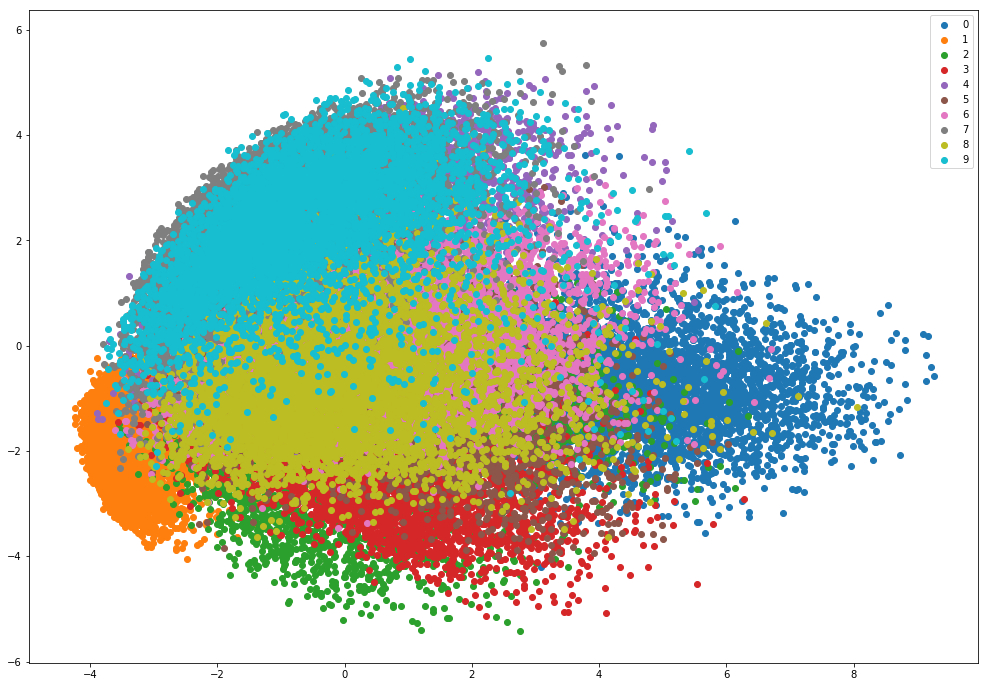

In [24]:
plot_2d(X_train_pca, y_train)

In [14]:
from sklearn.manifold import TSNE

# Reduce 50 dimensions first, otherwise tSNE computation will take too long
X_train_pca_50 = PCA(n_components=50).fit_transform(X_train)

In [15]:
X_train_tsne = TSNE(n_components=2).fit_transform(X_train_pca_50)

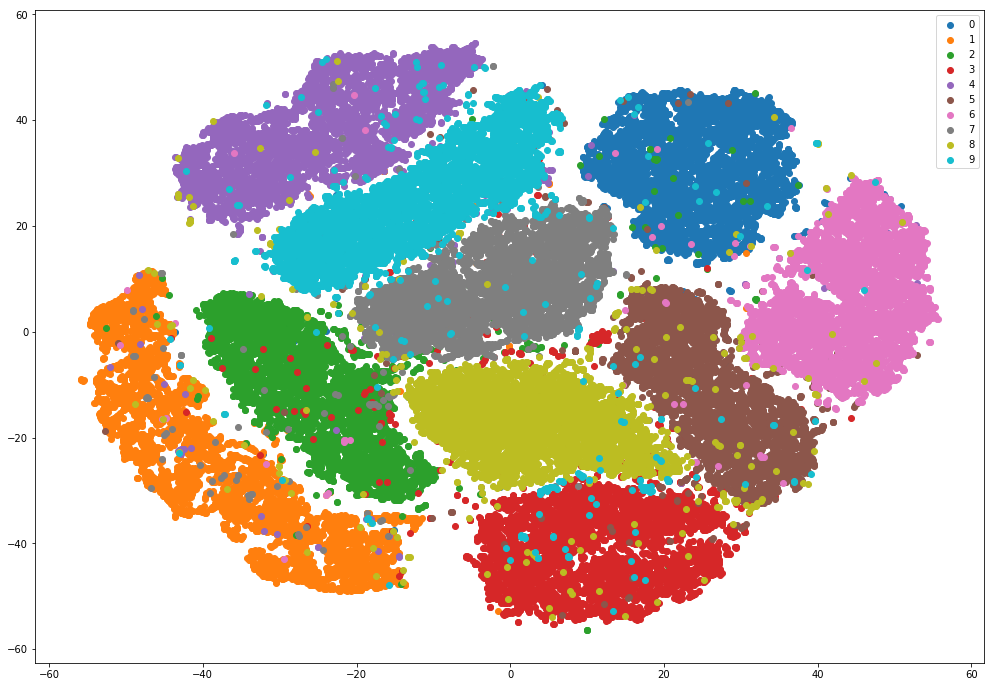

In [28]:
plot_2d(X_train_tsne, y_train, 'tsne-cloud.svg')